### First we make explicit the installation of libraries we will use and the importing.

In [1]:
!pip3 install -q --upgrade pip
!pip3 install -q pandas numpy matplotlib seaborn openpyxl climateserv requests netCDF4 xarray pyproj statsmodels

In [2]:
import sys
from pathlib import Path

# Calculate the path to the scripts folder relative to the current notebook.
scripts_dir = Path("../../").resolve()

# Add the scripts directory to the sys.path if it's not already there.
if str(scripts_dir) not in sys.path:
    sys.path.append(str(scripts_dir))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Assuming the CSV file is named "data.csv" and is located in the same directory as the notebook
df = pd.read_csv("../../data/processed_data/wells_data_gambia_for_machine_learning.csv")

# Delete the column Date
#df = df.drop(columns=['Date'])


In [4]:
print(df.columns)
df

Index(['ID', 'GROUNDWATER_LEVEL', 'Day', 'Month', 'Year', 'Latitude',
       'Longitude', 'Ground surface elevation', 'LIS_Soil_Moisture_Combined',
       'LIS_Streamflow', 'LIS_ET', 'MOD13Q1_061__250m_16_days_EVI',
       'MOD13Q1_061__250m_16_days_MIR_reflectance',
       'MOD13Q1_061__250m_16_days_NDVI', 'NASA_IMERG_Late',
       'DepthToGroundwater', 'Curvatu_tif2', 'Drainage_density', 'Slope_tif2',
       'Hydrogeo', 'NASADEM_HGT'],
      dtype='object')


,ID,GROUNDWATER_LEVEL,Day,Month,Year,Latitude,Longitude,Ground surface elevation,LIS_Soil_Moisture_Combined,LIS_Streamflow,...,MOD13Q1_061__250m_16_days_EVI,MOD13Q1_061__250m_16_days_MIR_reflectance,MOD13Q1_061__250m_16_days_NDVI,NASA_IMERG_Late,DepthToGroundwater,Curvatu_tif2,Drainage_density,Slope_tif2,Hydrogeo,NASADEM_HGT
0,NWP00001,14.26,14,4,2016,13.420804,-16.716666,19.47,0.172124,0.059371,...,0.2113,0.3972,0.2564,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
1,NWP00001,13.82,26,12,2015,13.420804,-16.716666,19.47,0.210837,0.136391,...,0.2443,0.1787,0.4064,1.3,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
2,NWP00001,13.82,25,12,2015,13.420804,-16.716666,19.47,0.211614,0.138738,...,0.2443,0.1787,0.4064,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
3,NWP00001,13.83,24,12,2015,13.420804,-16.716666,19.47,0.212448,0.141231,...,0.2443,0.1787,0.4064,0.1,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
4,NWP00001,13.83,23,12,2015,13.420804,-16.716666,19.47,0.213260,0.143826,...,0.2443,0.1787,0.4064,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,NWP21002,16.85,5,1,2015,13.240281,-16.713889,21.68,0.232334,0.085506,...,0.1795,0.2054,0.3419,0.5,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
6632,NWP21002,16.79,4,1,2015,13.240281,-16.713889,21.68,0.232903,0.086226,...,0.1795,0.2054,0.3419,0.1,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
6633,NWP21002,16.82,3,1,2015,13.240281,-16.713889,21.68,0.233475,0.086970,...,0.1795,0.2054,0.3419,0.0,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
6634,NWP21002,16.82,2,1,2015,13.240281,-16.713889,21.68,0.234051,0.087731,...,0.1795,0.2054,0.3419,0.0,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0


In [5]:
def analyze_missing_values(df: pd.DataFrame):
    """
    Calculate and visualize missing values in the dataset.
    """
    plt.show()
    # Calculate missing values
    missing_values = df.isnull().sum()
    print(f"Missing values per column:\n{missing_values}")

In [6]:
analyze_missing_values(df=df)

Missing values per column:
ID                                             0
GROUNDWATER_LEVEL                              0
Day                                            0
Month                                          0
Year                                           0
Latitude                                       0
Longitude                                      0
Ground surface elevation                       0
LIS_Soil_Moisture_Combined                     0
LIS_Streamflow                                 0
LIS_ET                                         0
MOD13Q1_061__250m_16_days_EVI                  0
MOD13Q1_061__250m_16_days_MIR_reflectance      0
MOD13Q1_061__250m_16_days_NDVI                 0
NASA_IMERG_Late                                0
DepthToGroundwater                             0
Curvatu_tif2                                   0
Drainage_density                               0
Slope_tif2                                     0
Hydrogeo                                  

In [20]:
def plot_histograms(df: pd.DataFrame, number_of_columns: int = 4):
    """
    Plot histograms for each column in the DataFrame.
    
    Parameters:
    - df: pandas.DataFrame
    - number_of_columns: int (default is 4)
    """
    number_of_rows = (len(df.columns) + number_of_columns - 1) // number_of_columns
    plt.figure(figsize=(5 * number_of_columns, 4 * number_of_rows))  # Adjust the figure size here

    for i, column in enumerate(df.columns):
        plt.subplot(number_of_rows, number_of_columns, i + 1)
        df[column].hist(bins=20, edgecolor='black')
        plt.title(column)

    plt.tight_layout()  # Adjust subplot params so that the subplots fit into the figure area.
    plt.show()


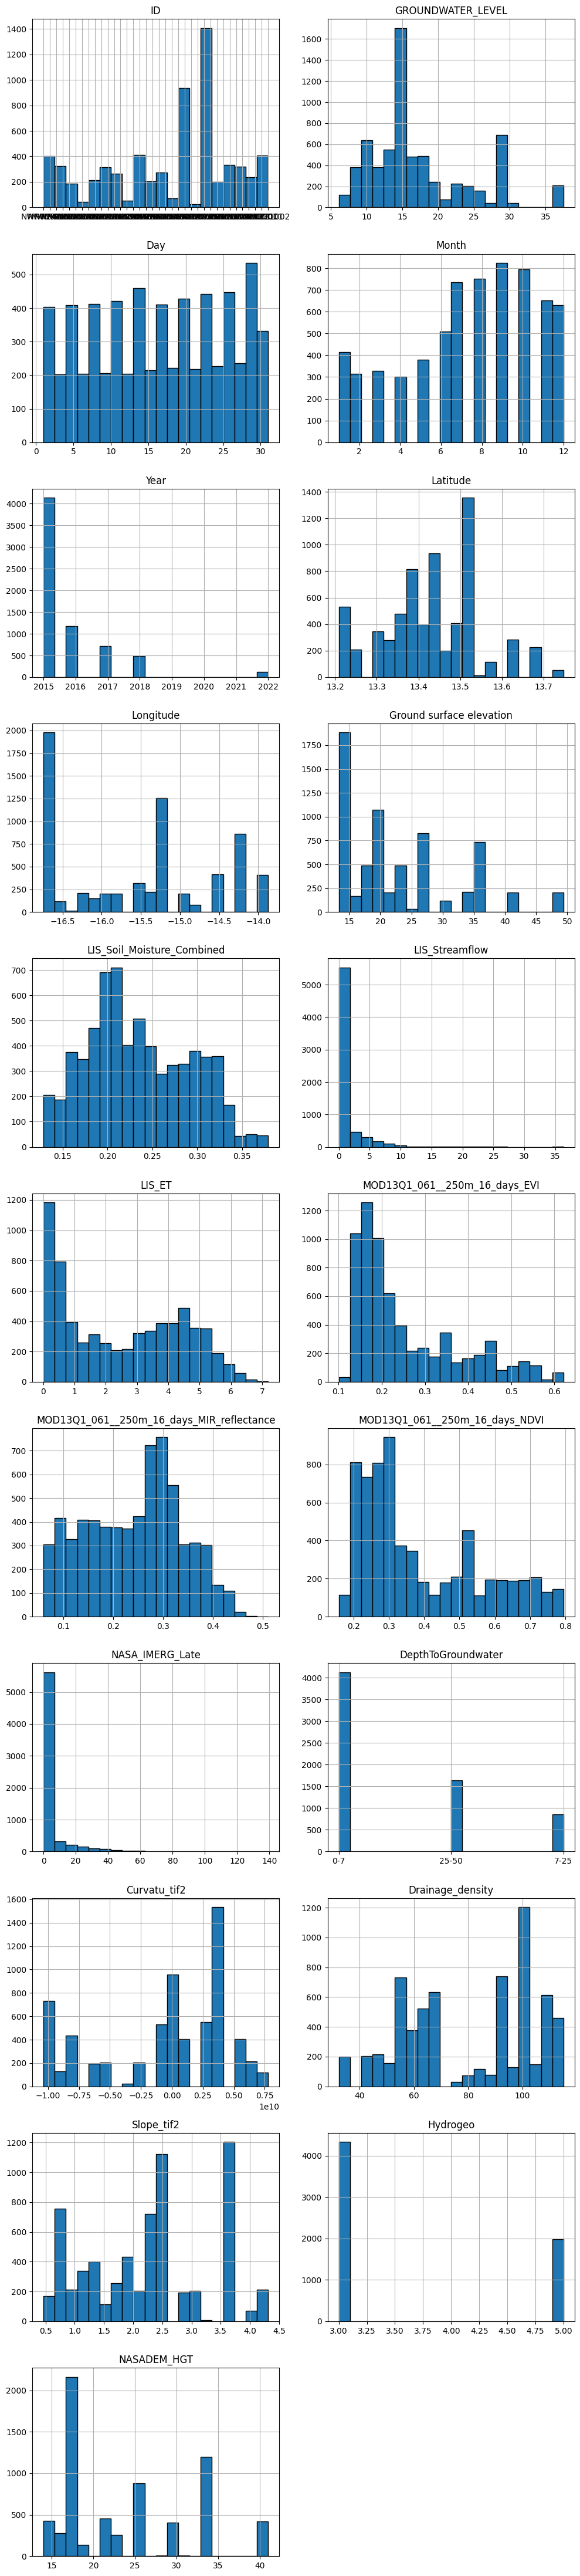

In [23]:
plot_histograms(df=df, number_of_columns=2) # You can adjust the number of columns based on your preference

In [29]:
# Descriptive Statistics
descriptive_stats = df.describe()
descriptive_stats


,GROUNDWATER_LEVEL,Day,Month,Year,Latitude,Longitude,Ground surface elevation,LIS_Soil_Moisture_Combined,LIS_Streamflow,LIS_ET,MOD13Q1_061__250m_16_days_EVI,MOD13Q1_061__250m_16_days_MIR_reflectance,MOD13Q1_061__250m_16_days_NDVI,NASA_IMERG_Late,Curvatu_tif2,Drainage_density,Slope_tif2,Hydrogeo,NASADEM_HGT
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6.636000e+03,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6.636000e+03,6636.000000,6636.000000,6317.000000,6636.000000
mean,17.298386,16.240205,7.453134,2015.740657,13.431545,-15.534849,23.067074,0.234569,1.002780e+00,2.491864,0.256361,0.242863,0.386543,4.311799,-5.177360e+08,80.476317,2.242751,3.628779,23.844033
std,7.106984,8.860938,3.219955,1.266499,0.115696,0.965602,9.349296,0.056652,2.203229e+00,1.913542,0.121846,0.096223,0.170358,11.600610,5.275964e+09,23.508683,1.057477,0.928618,7.787819
min,6.130000,1.000000,1.000000,2015.000000,13.208963,-16.743327,13.340000,0.128638,7.212851e-07,0.006780,0.100300,0.060400,0.158400,0.000000,-1.036800e+10,32.400185,0.464550,3.000000,14.000000
25%,13.160000,9.000000,5.000000,2015.000000,13.361805,-16.659717,14.440000,0.193873,3.214696e-02,0.536071,0.166100,0.162100,0.253000,0.000000,-5.184000e+09,57.568844,1.354162,3.000000,17.000000
50%,14.890000,16.000000,8.000000,2015.000000,13.425272,-15.398813,20.350000,0.226028,1.085364e-01,2.352201,0.204300,0.260200,0.312800,0.000000,-0.000000e+00,87.874992,2.321531,3.000000,22.000000
75%,20.222500,24.000000,10.000000,2016.000000,13.517245,-14.587840,27.560000,0.282052,6.904700e-01,4.250781,0.333500,0.314000,0.515200,1.700000,3.888000e+09,99.226166,3.113298,5.000000,29.000000
max,37.510000,31.000000,12.000000,2022.000000,13.747787,-13.874254,49.400000,0.379154,3.633789e+01,7.190300,0.621400,0.510600,0.794700,139.199997,7.776000e+09,115.051437,4.312499,5.000000,41.000000


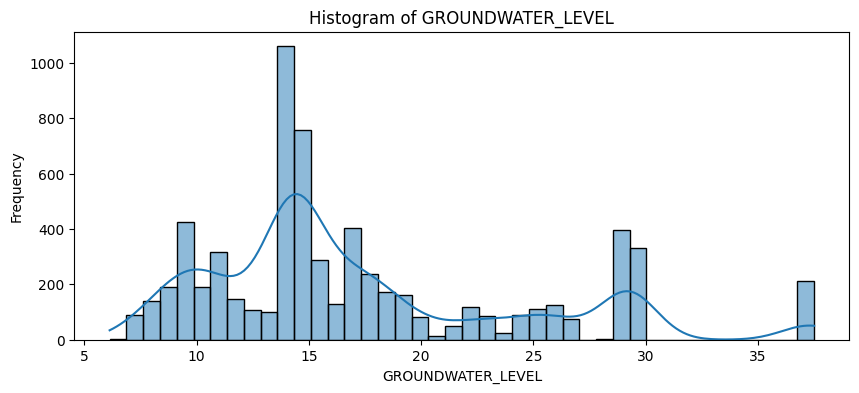

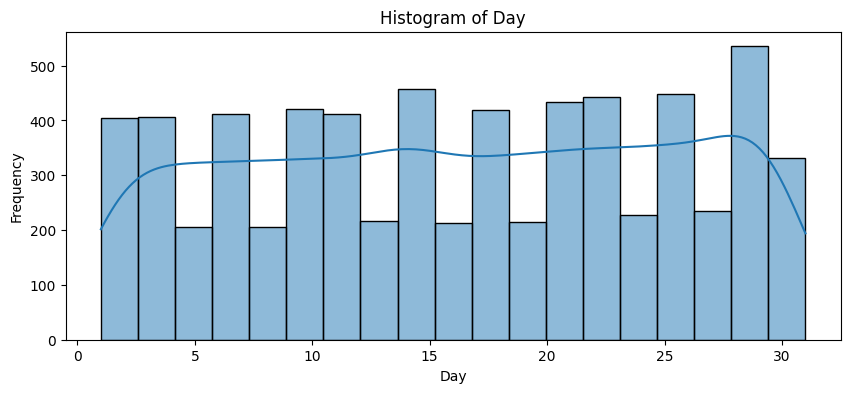

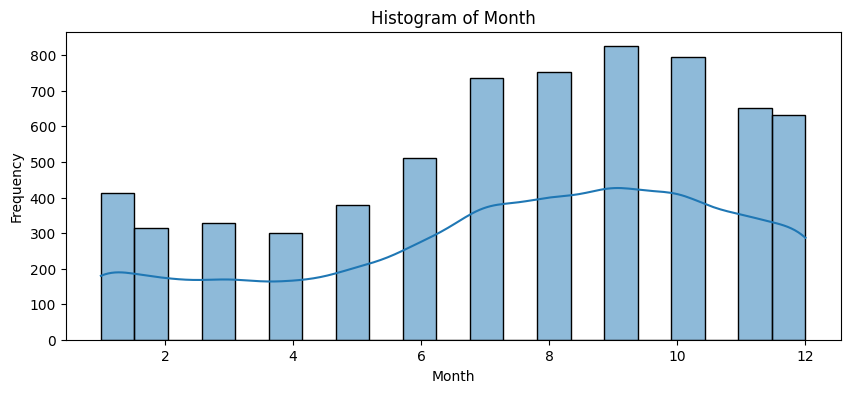

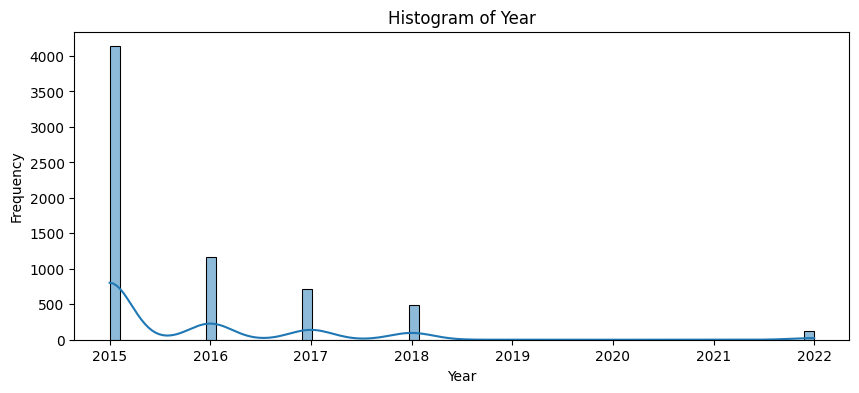

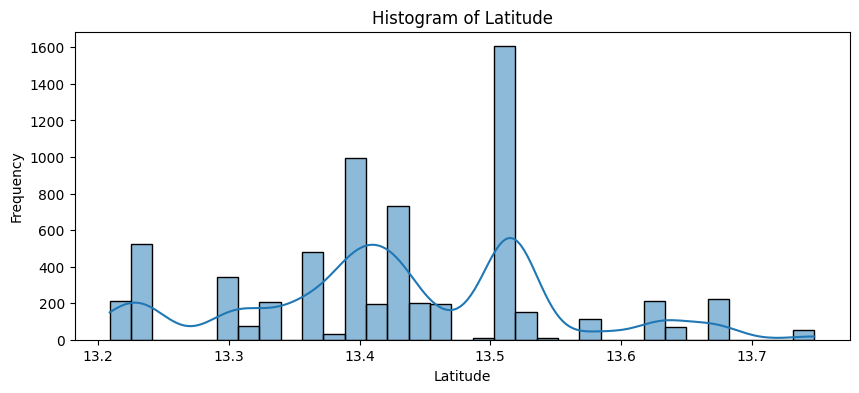

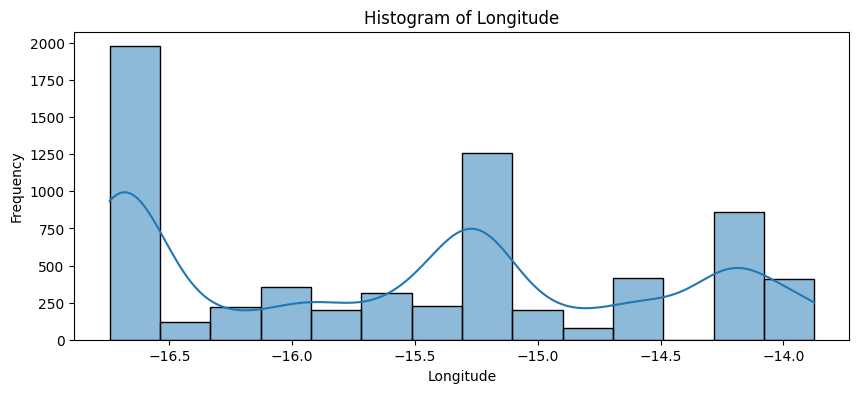

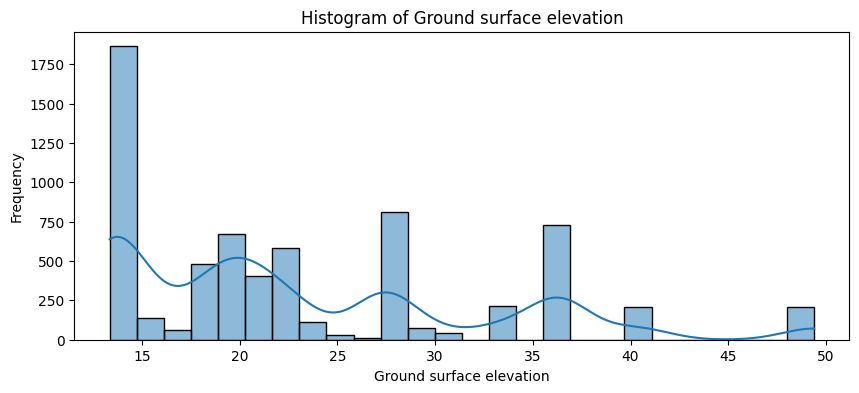

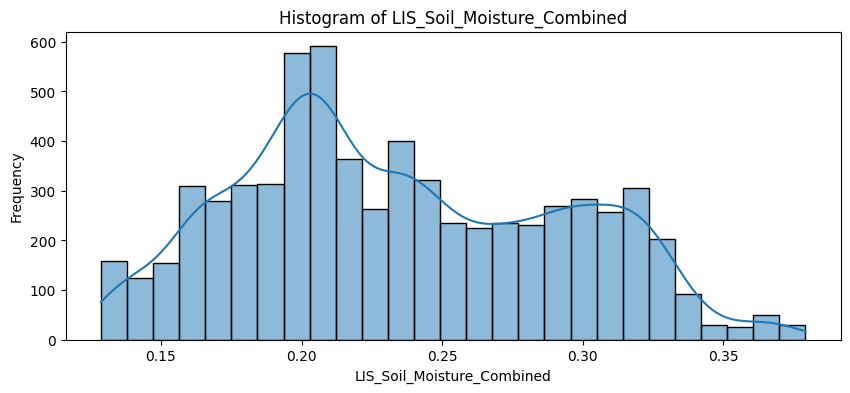

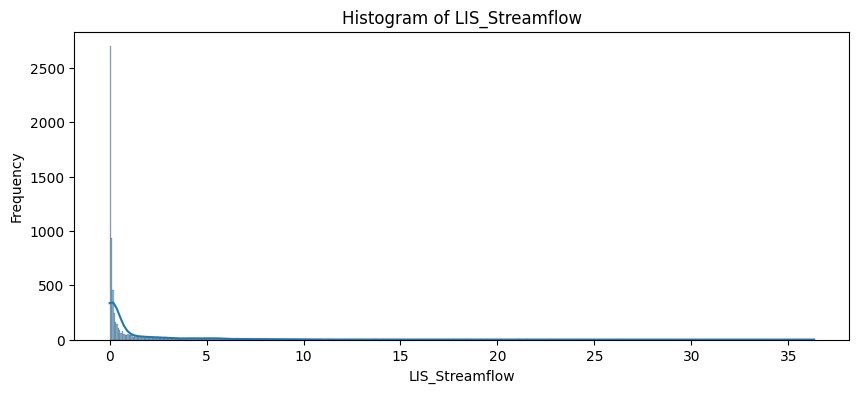

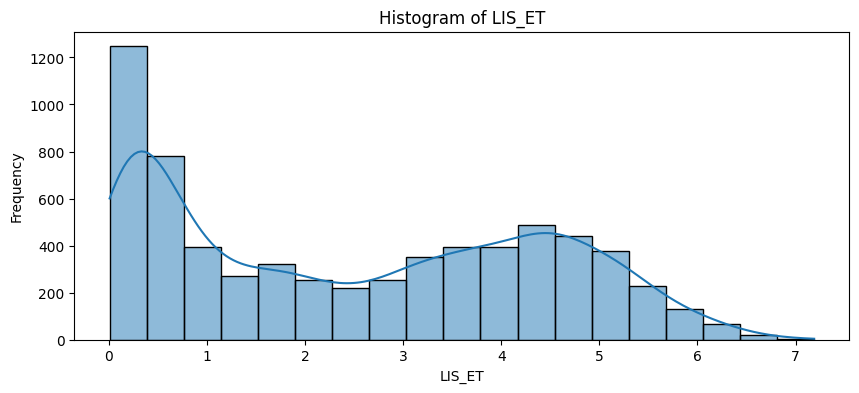

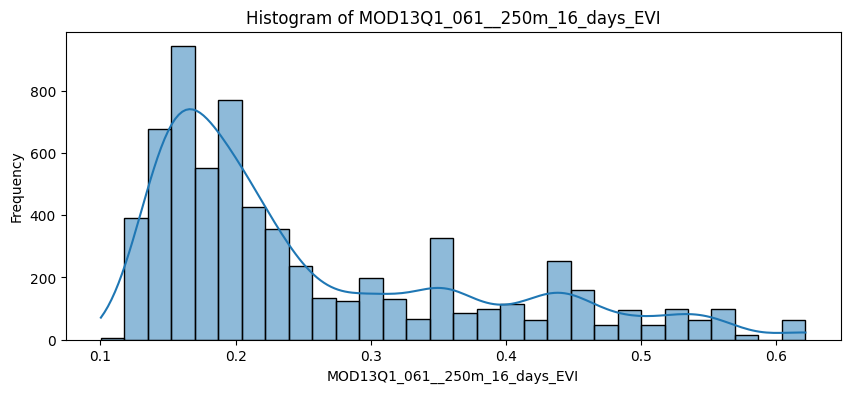

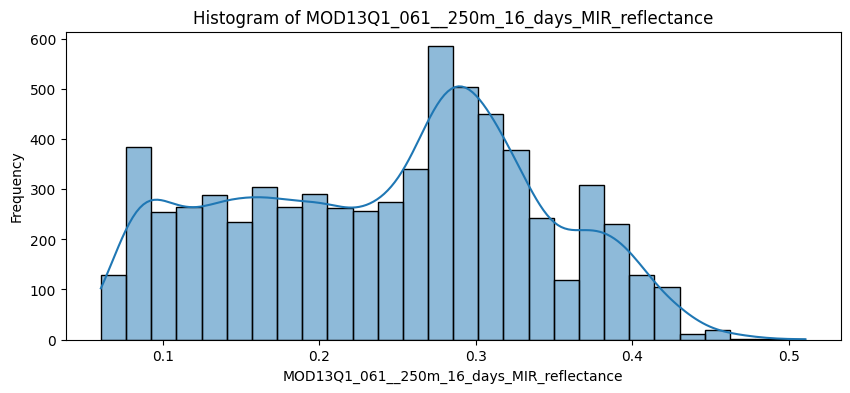

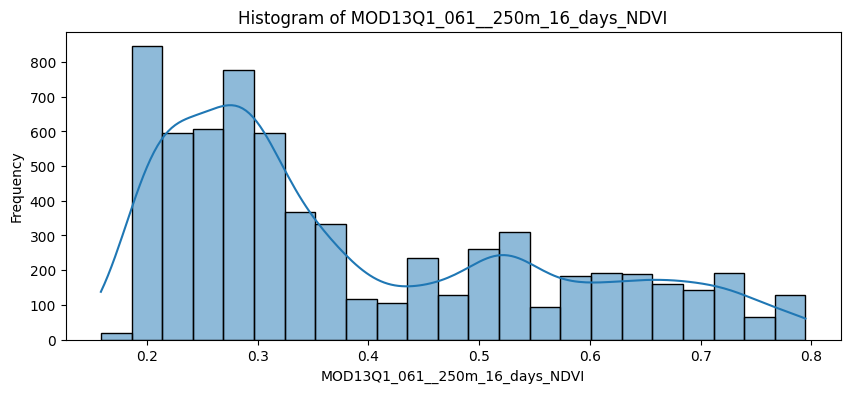

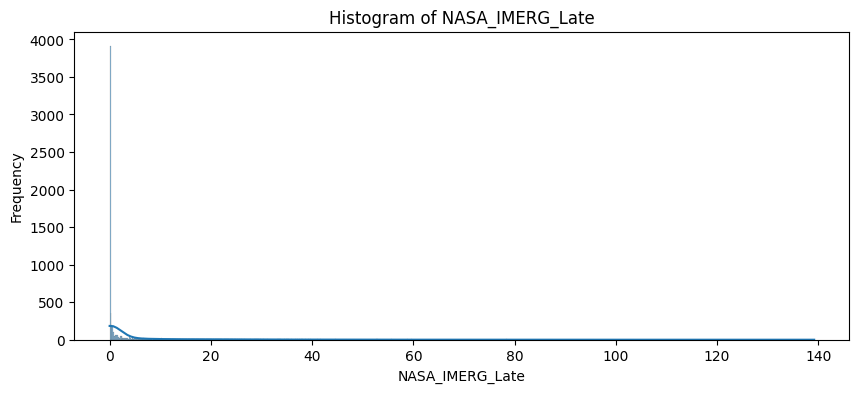

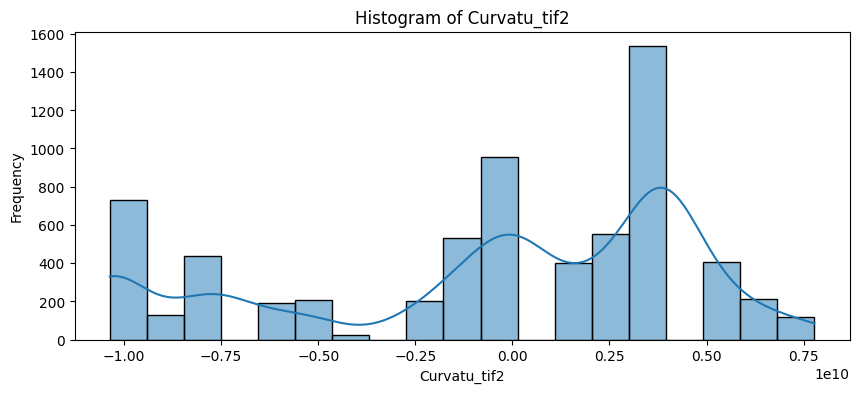

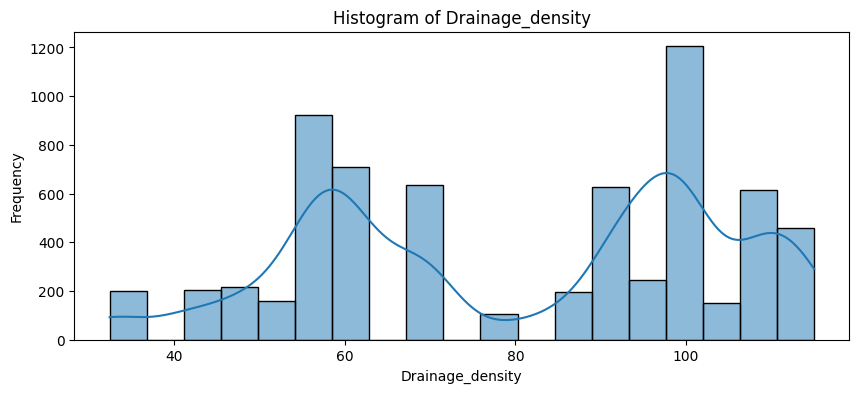

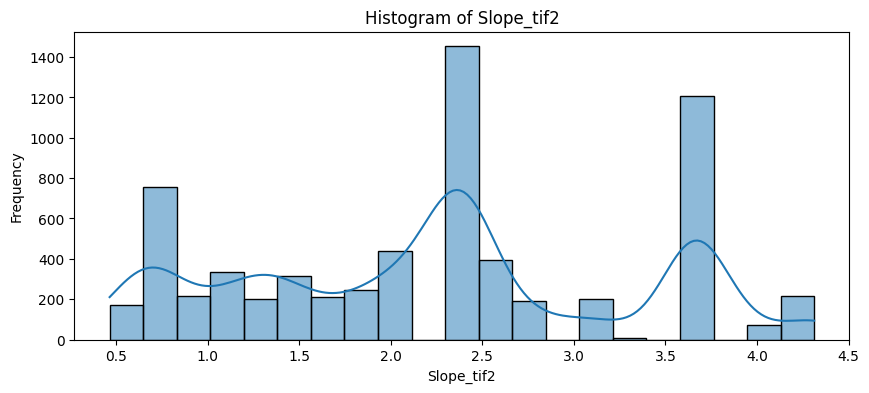

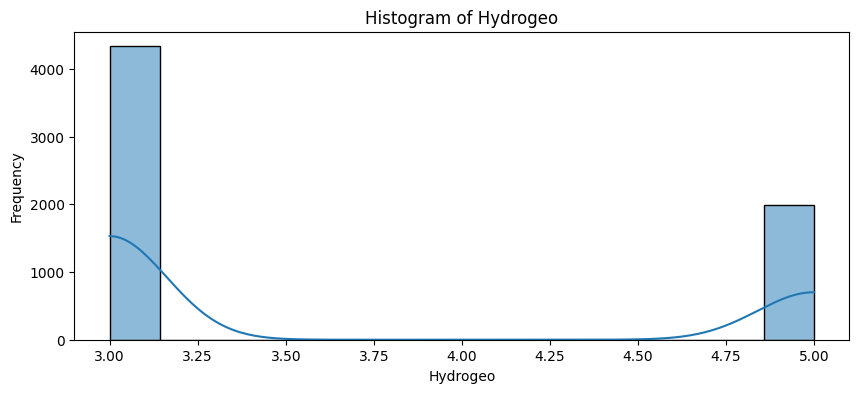

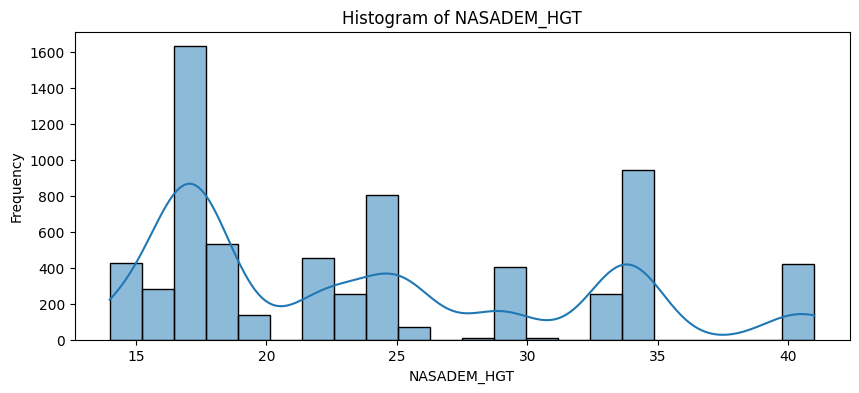

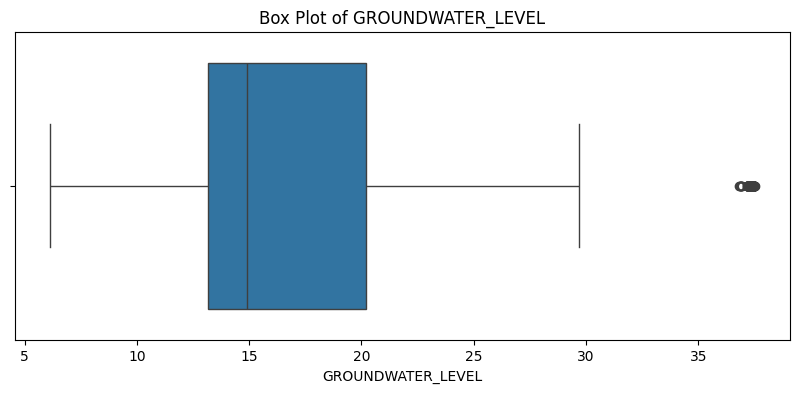

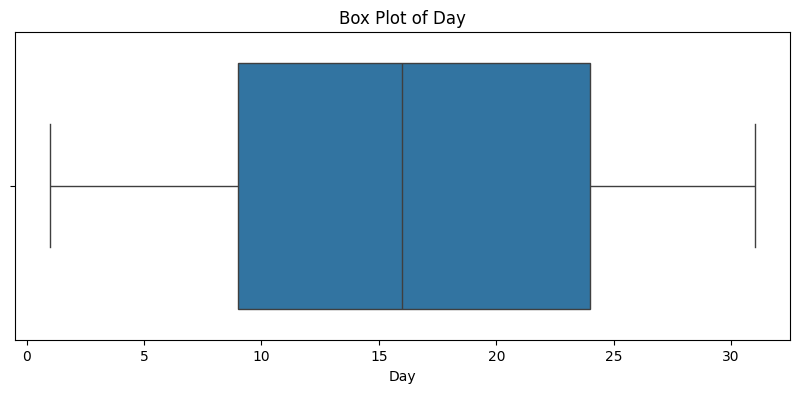

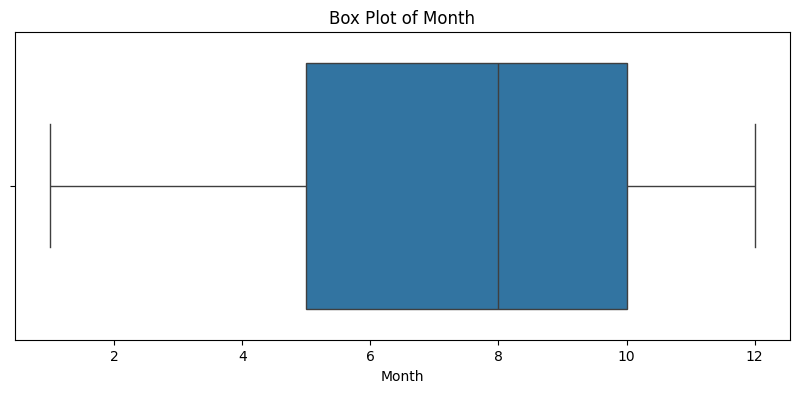

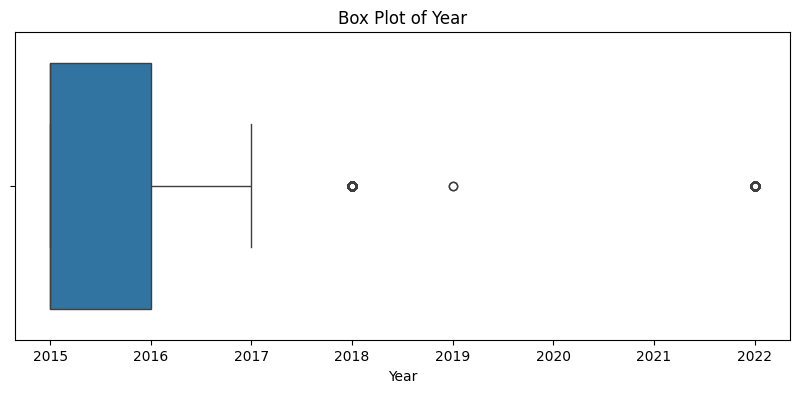

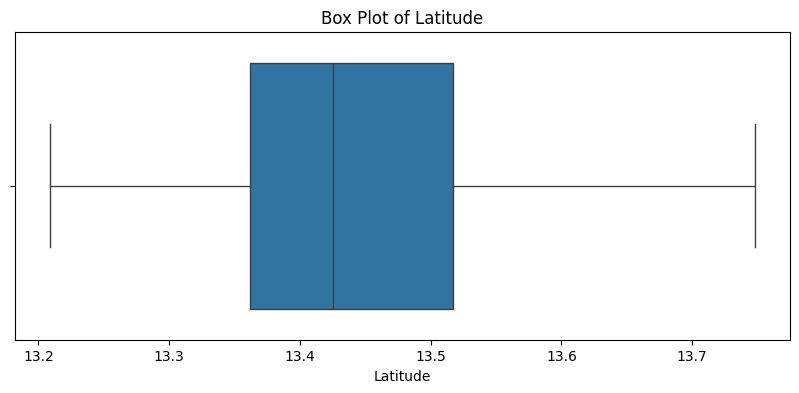

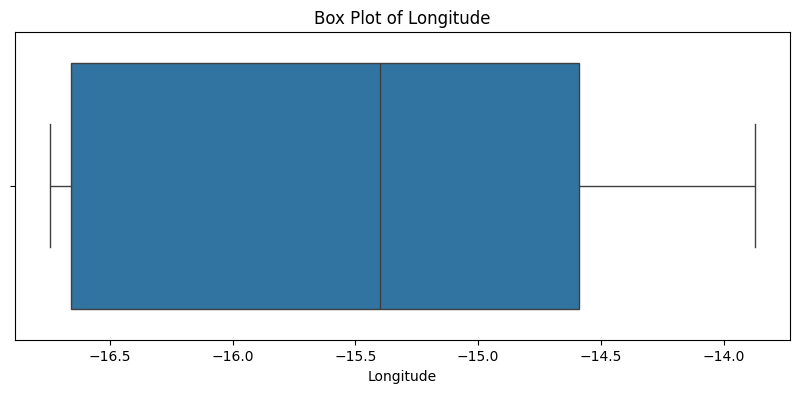

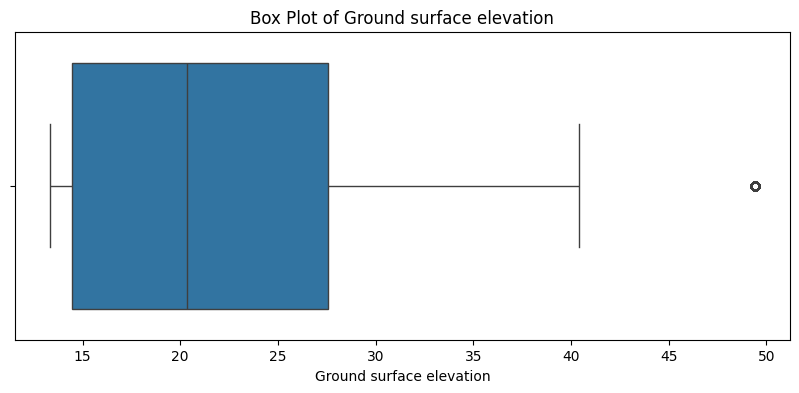

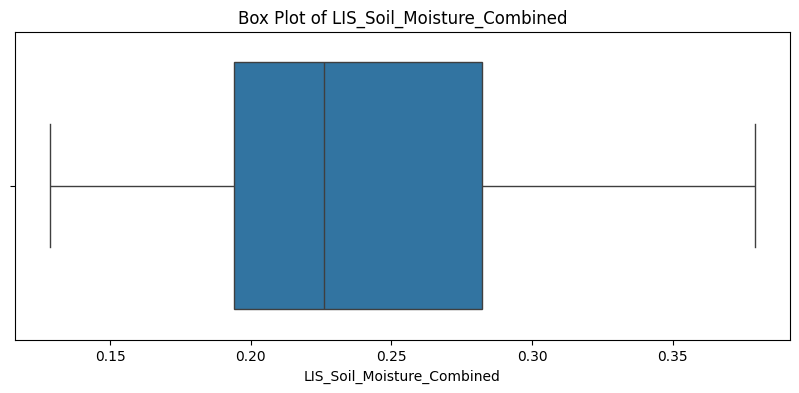

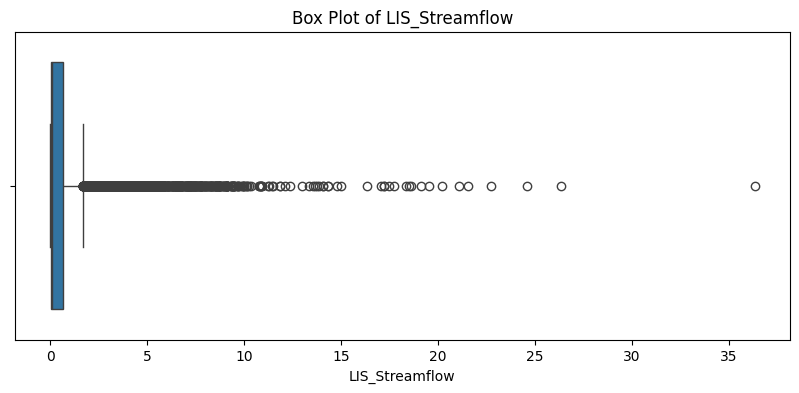

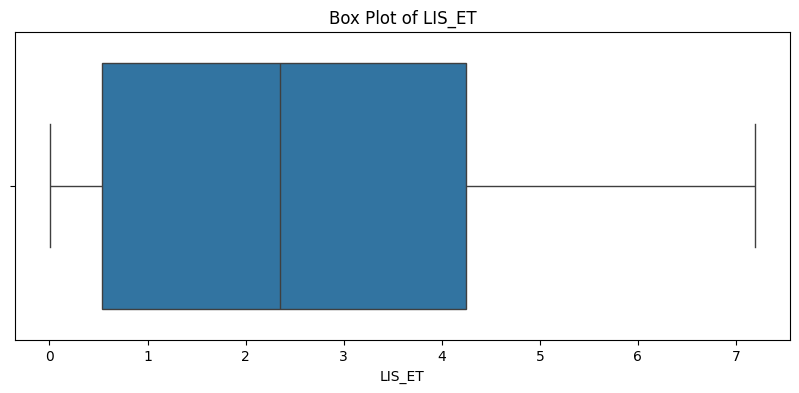

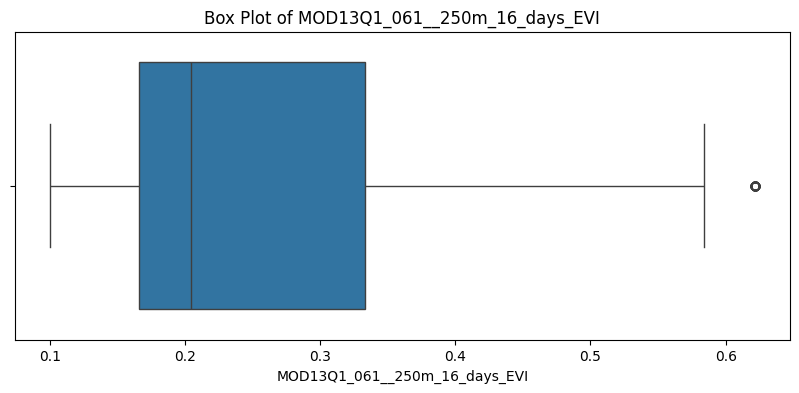

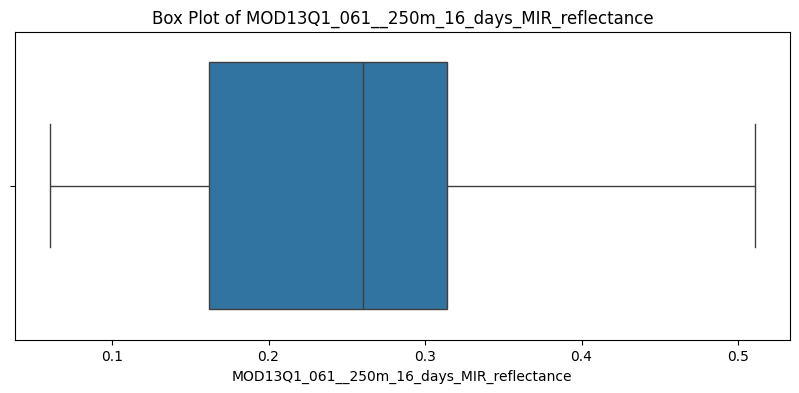

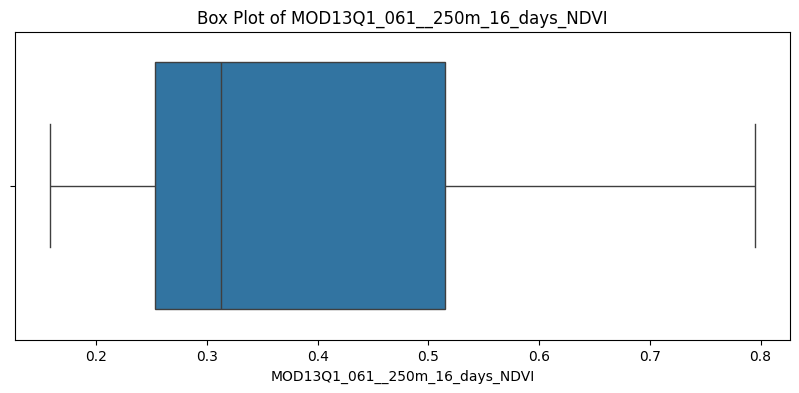

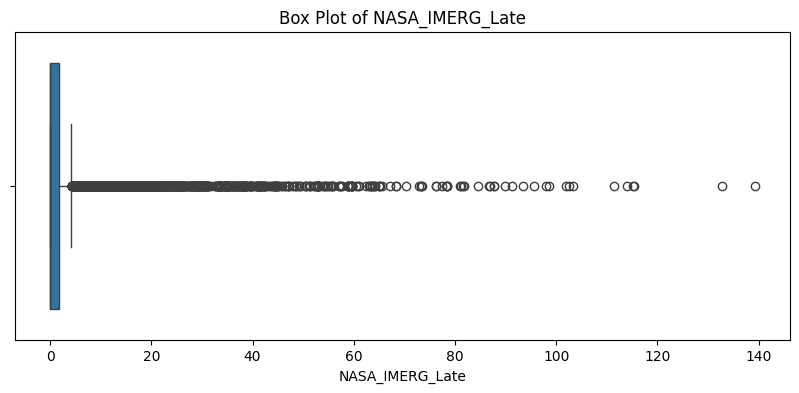

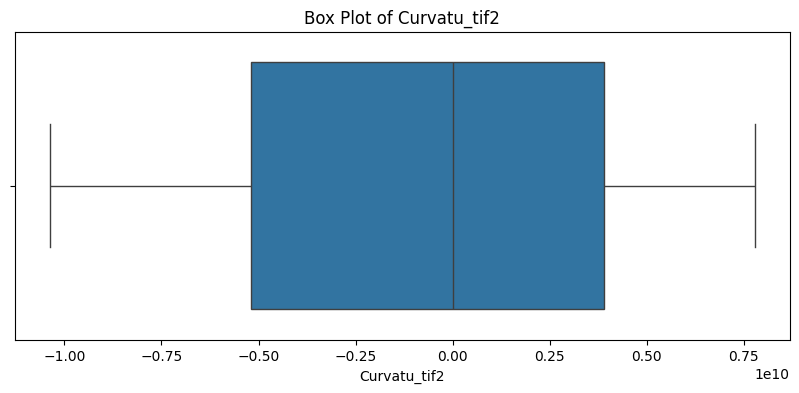

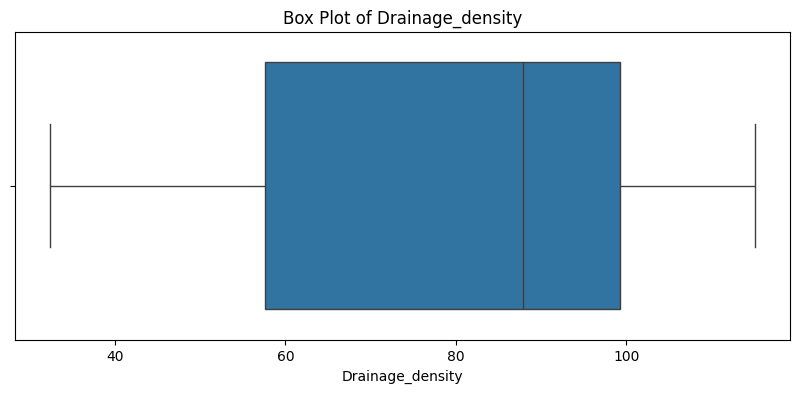

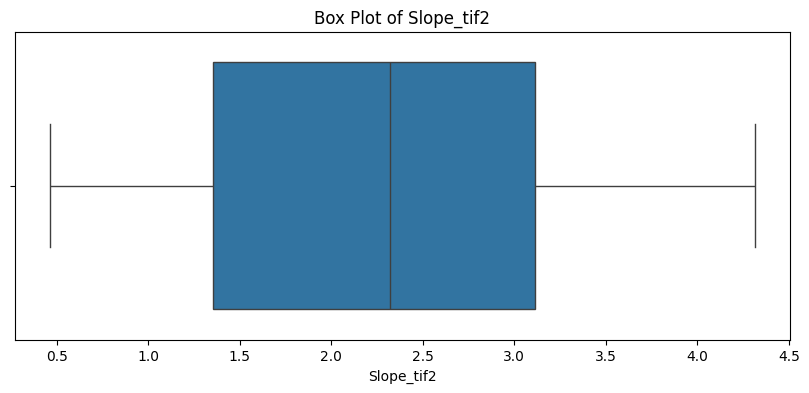

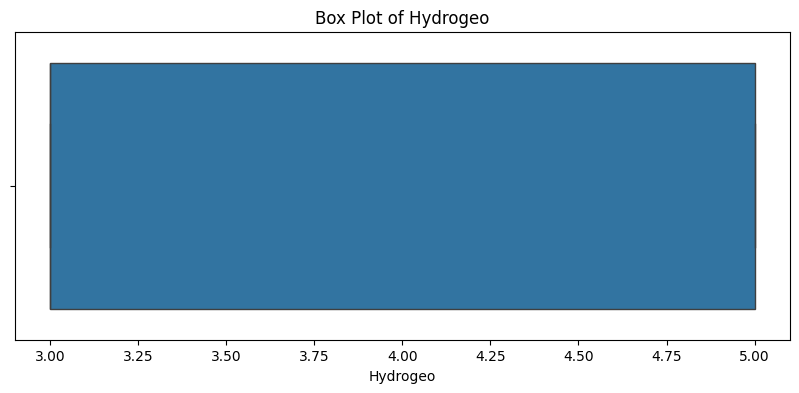

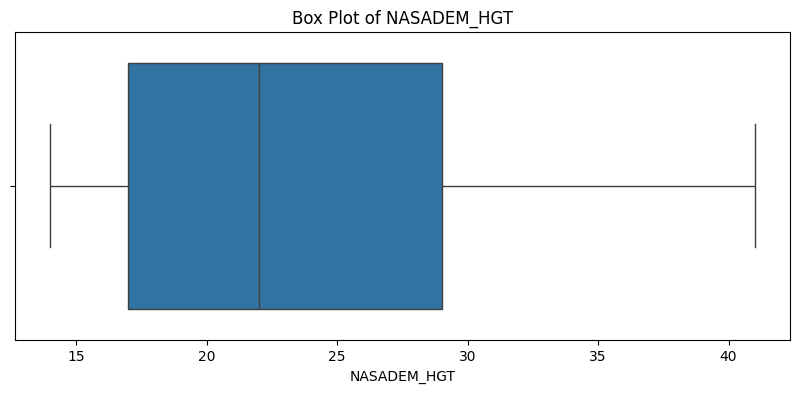

In [30]:
# Histograms
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box Plots
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


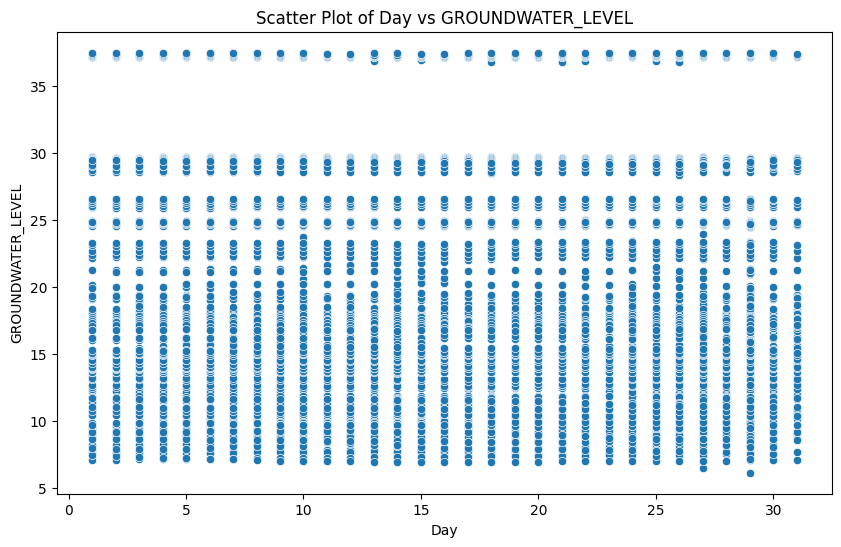

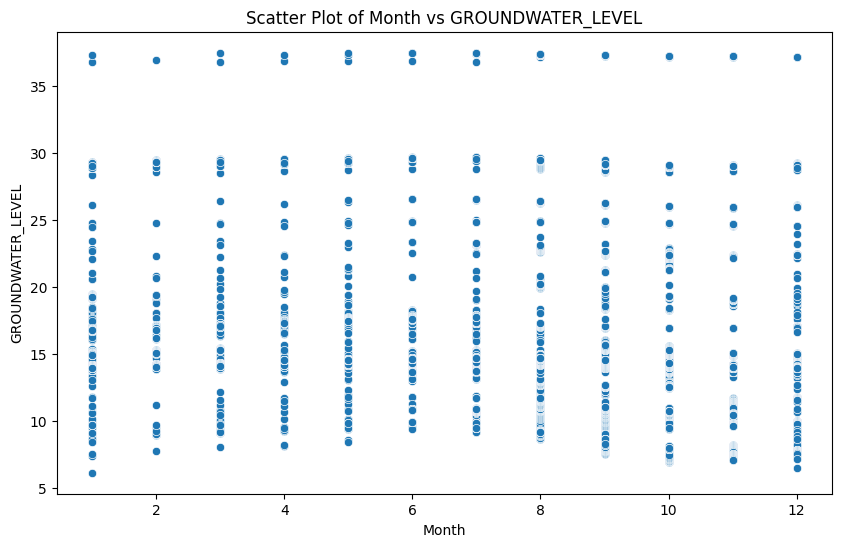

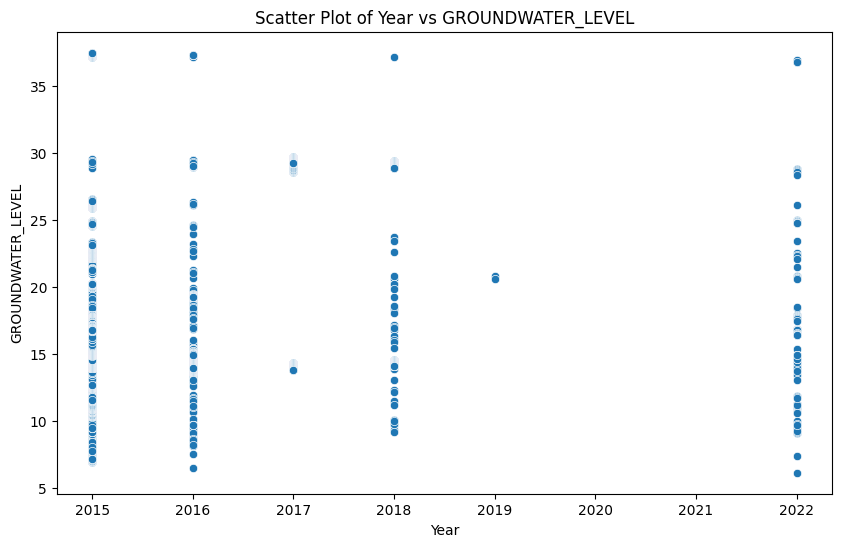

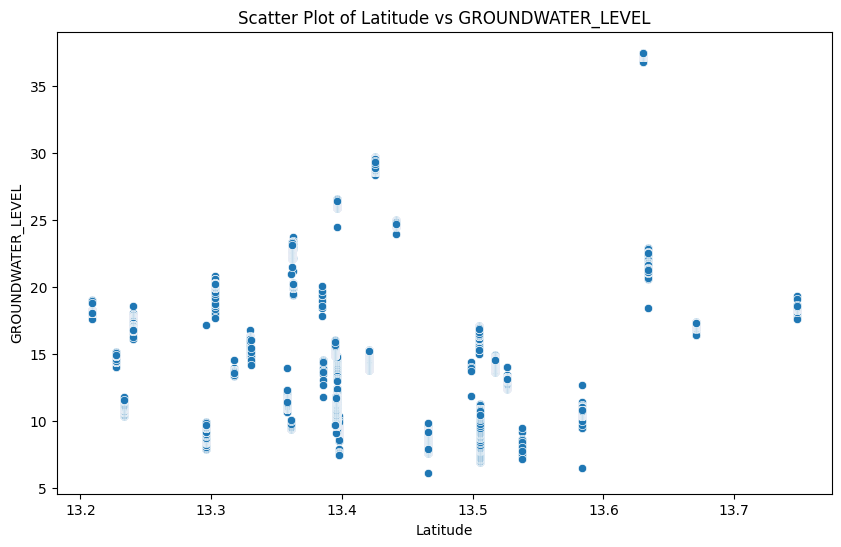

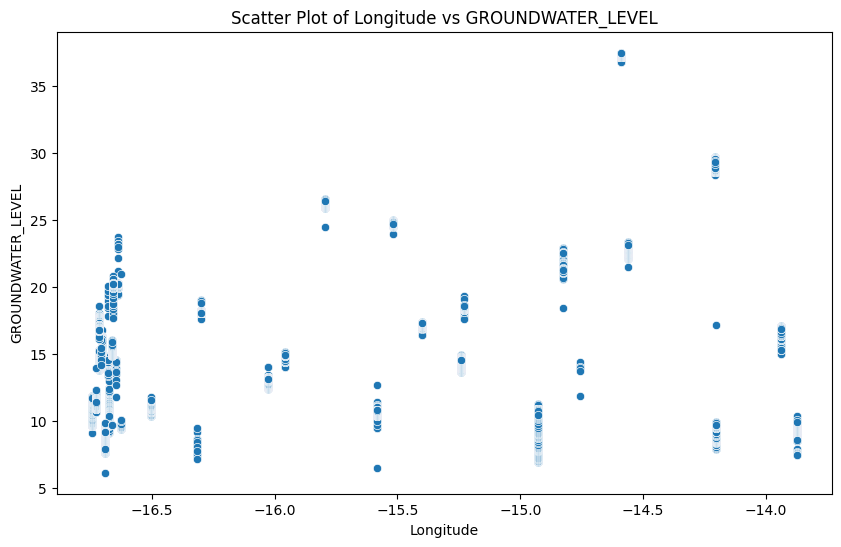

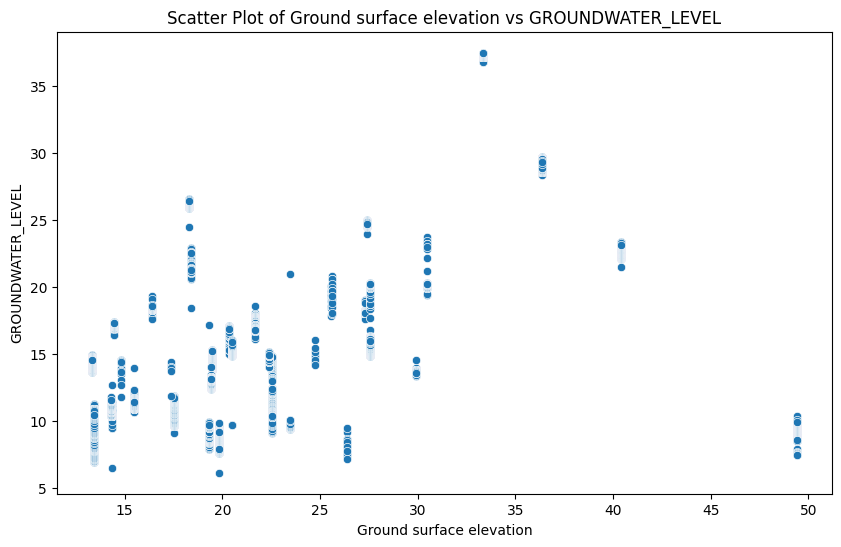

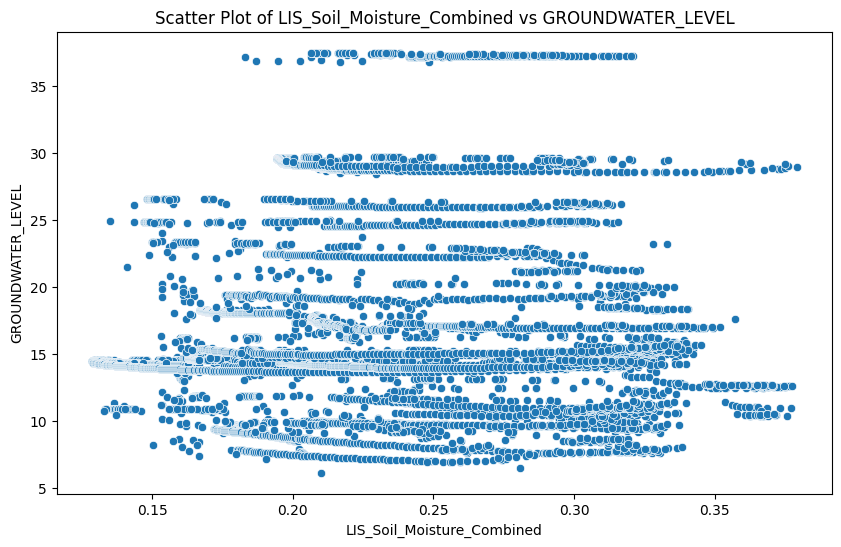

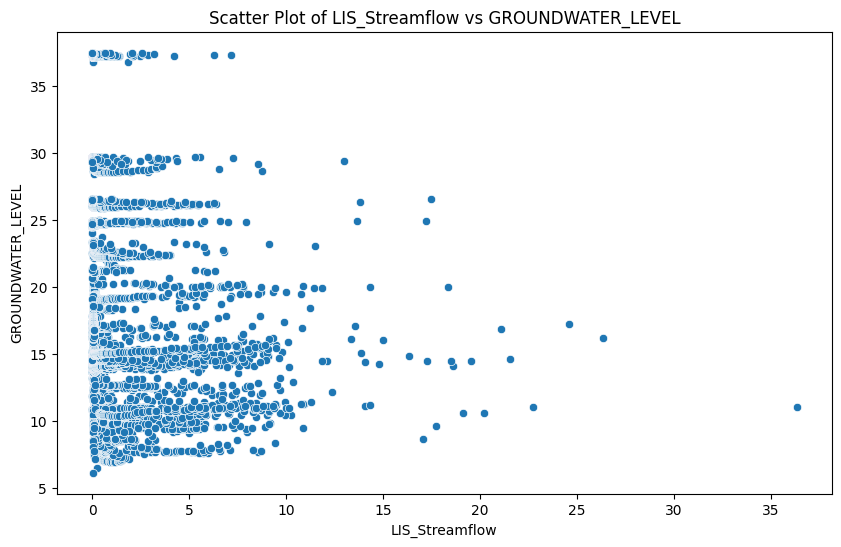

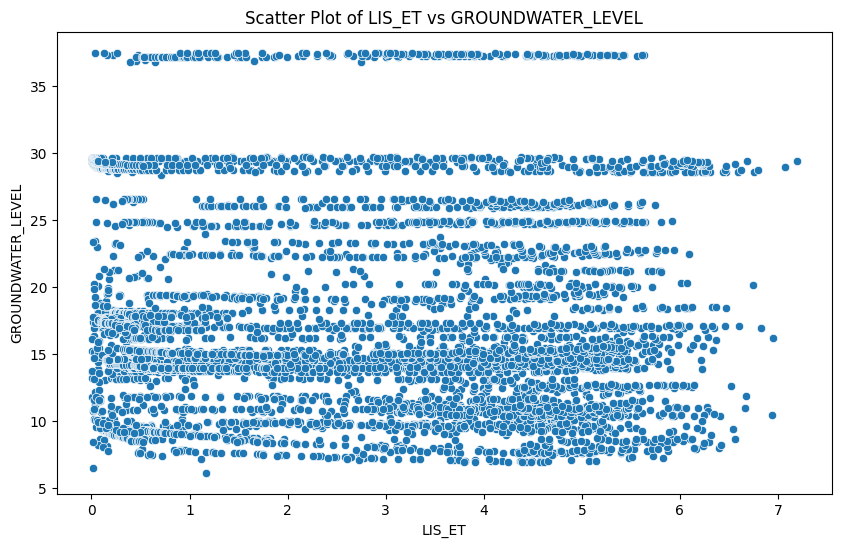

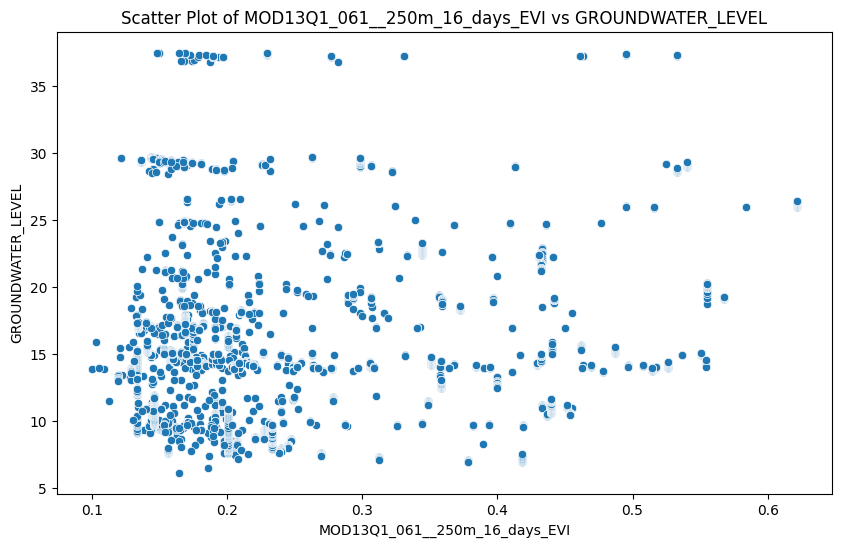

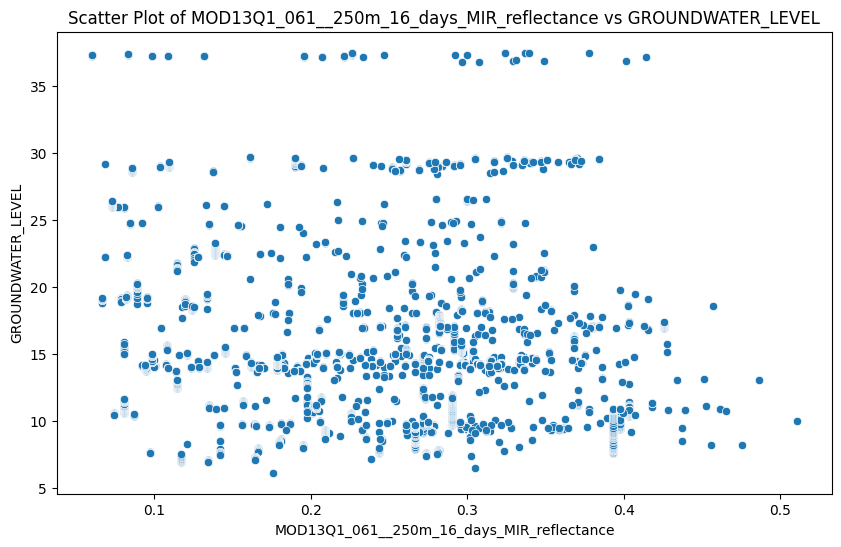

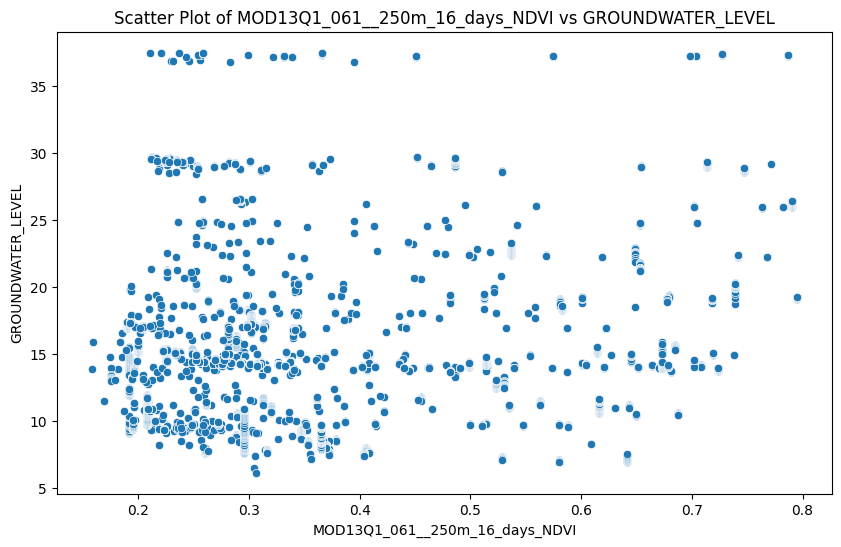

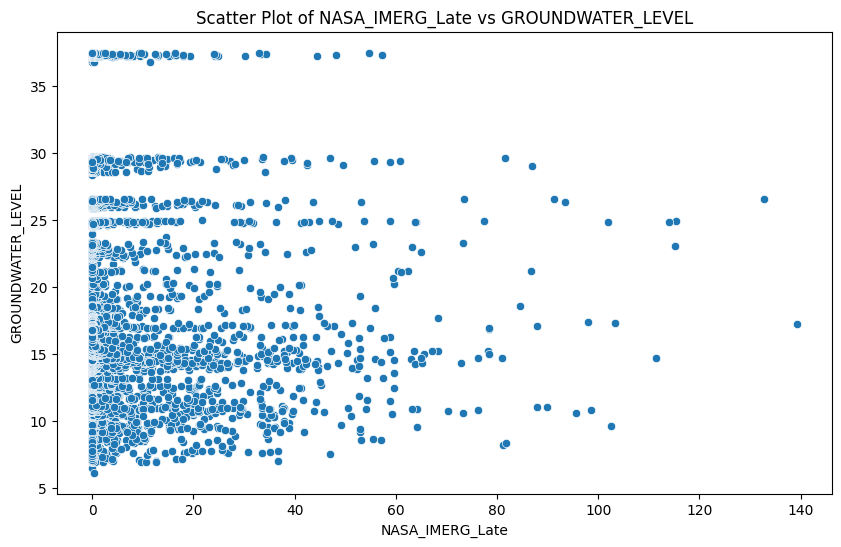

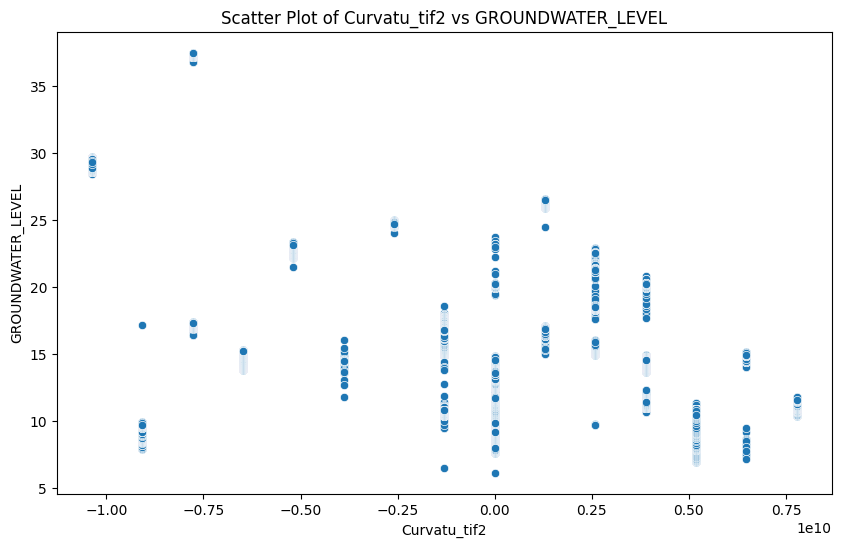

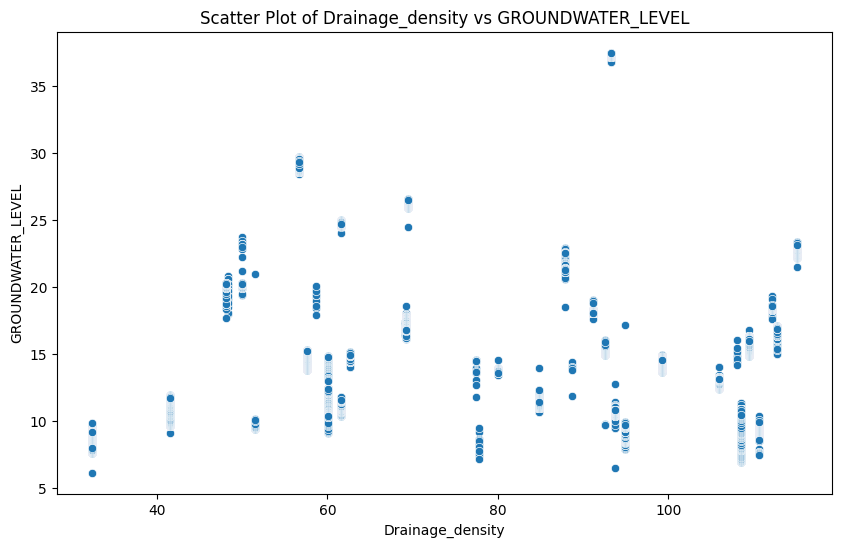

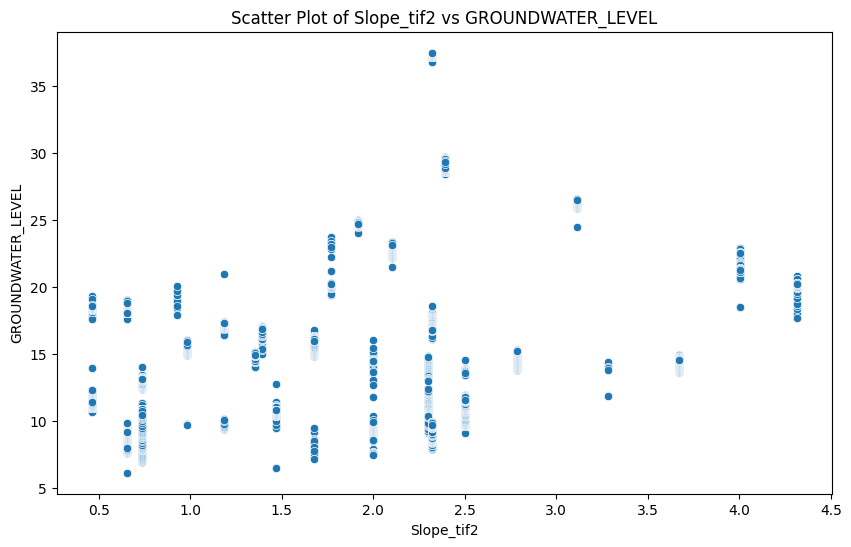

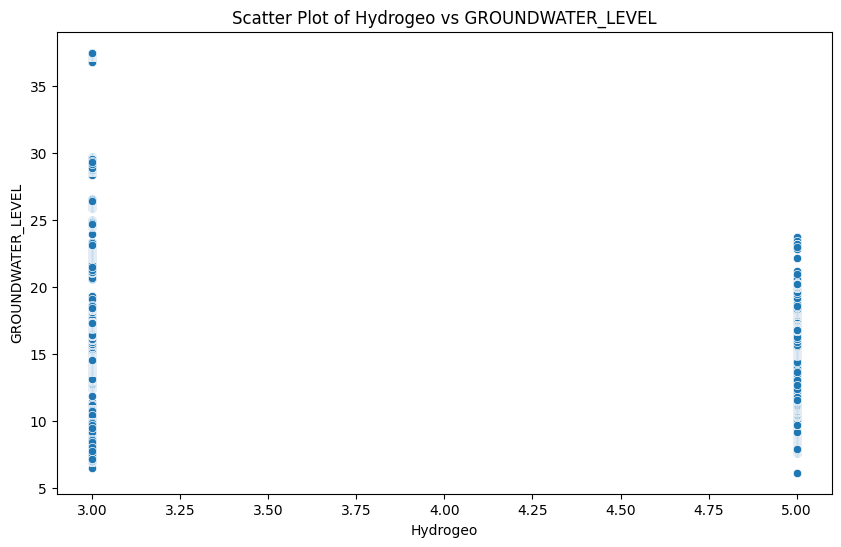

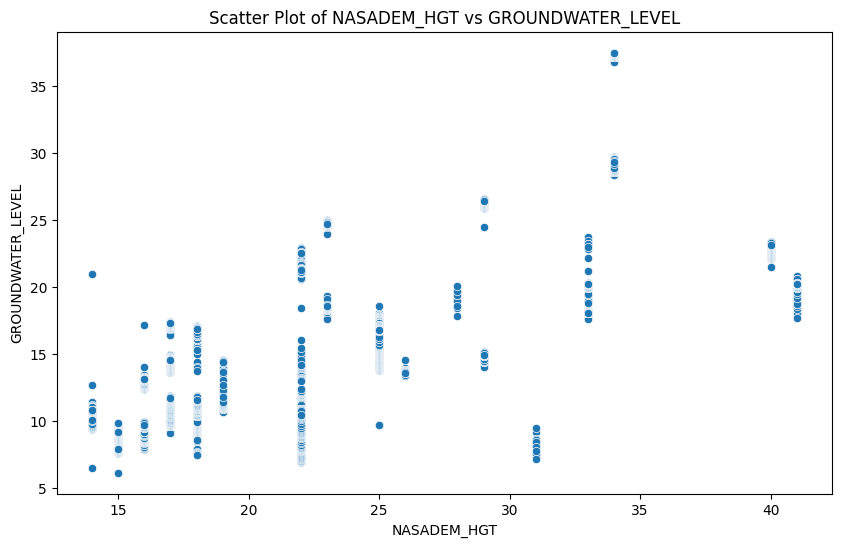

In [31]:
# Scatter Plots
target = 'GROUNDWATER_LEVEL'
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if column != target:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[column], y=df[target])
        plt.title(f'Scatter Plot of {column} vs {target}')
        plt.xlabel(column)
        plt.ylabel(target)
        plt.show()


In [33]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate Pearson Correlation
pearson_corr = numeric_df.corr(method='pearson')

# Calculate Spearman Correlation
spearman_corr = numeric_df.corr(method='spearman')


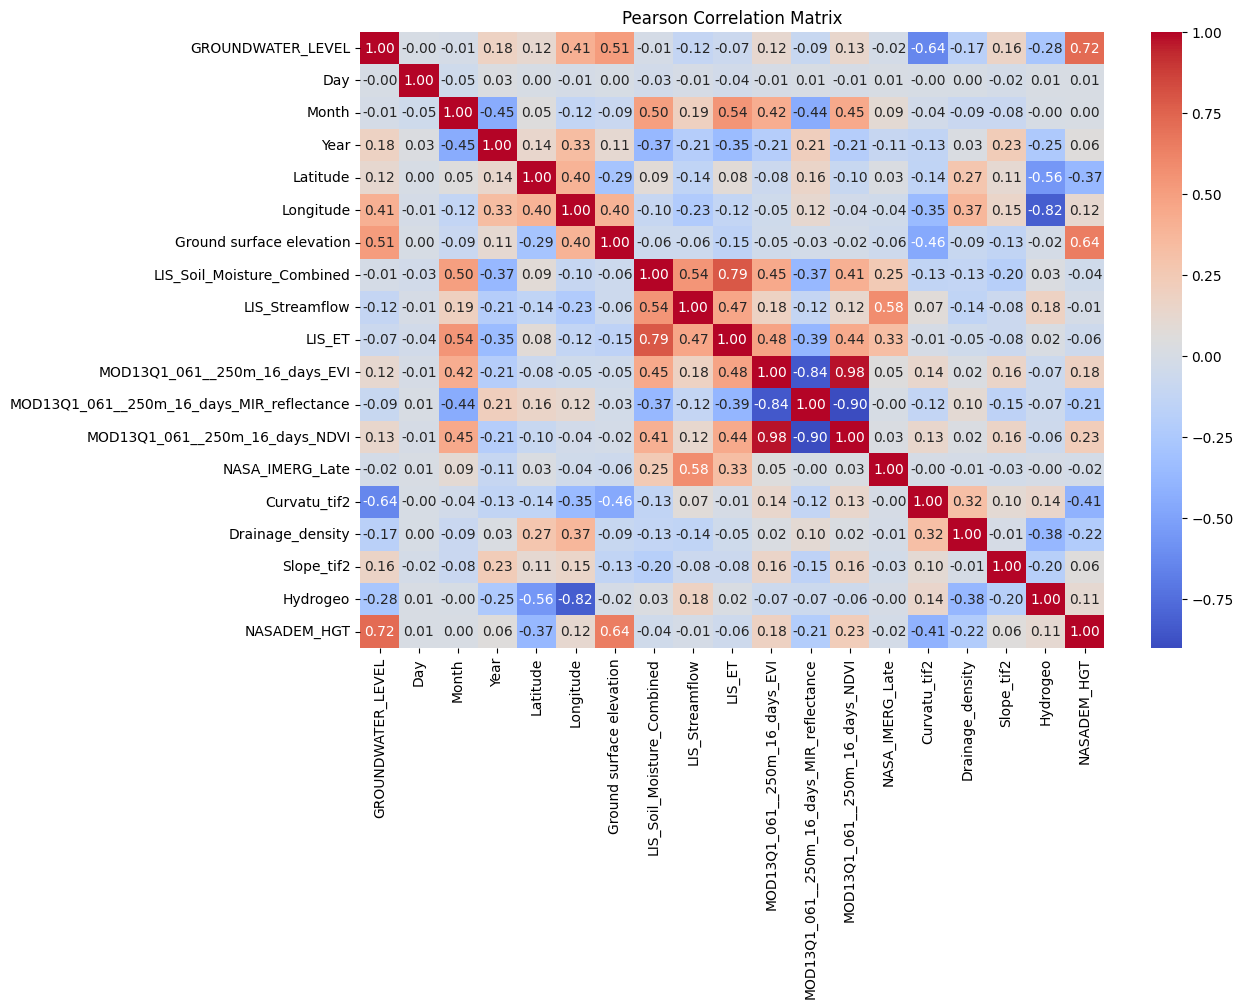

In [34]:
# Visualize Pearson Correlation with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Pearson Correlation Matrix")
plt.show()

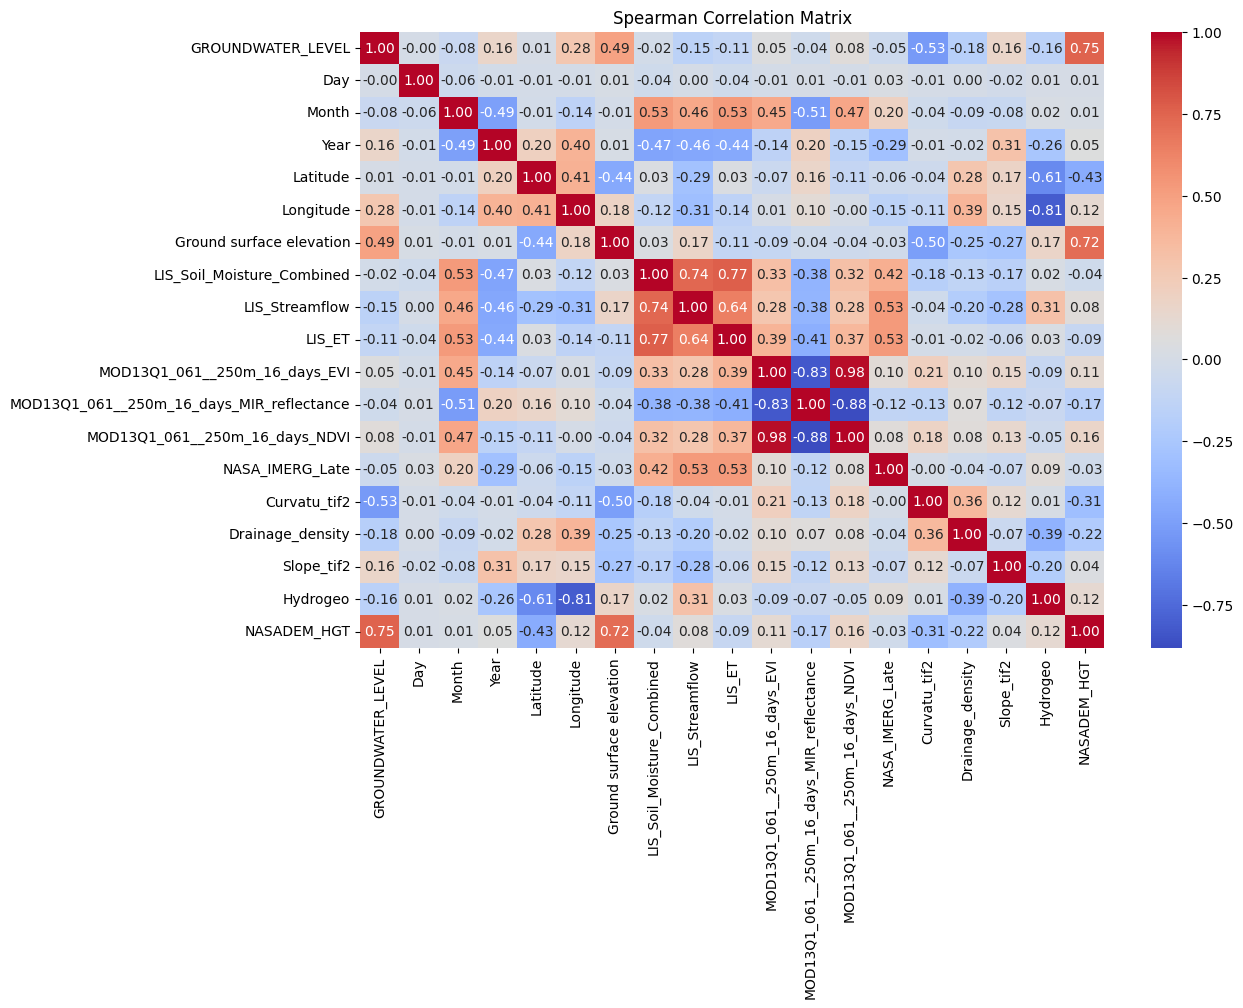

In [35]:
# Visualize Spearman Correlation with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Spearman Correlation Matrix")
plt.show()

In [8]:
for column_name, dtype in df.dtypes.items():
    print(f"Column '{column_name}' has data type: {dtype}")
df

Column 'ID' has data type: object
Column 'GROUNDWATER_LEVEL' has data type: float64
Column 'Day' has data type: int64
Column 'Month' has data type: int64
Column 'Year' has data type: int64
Column 'Latitude' has data type: float64
Column 'Longitude' has data type: float64
Column 'Ground surface elevation' has data type: float64
Column 'LIS_Soil_Moisture_Combined' has data type: float64
Column 'LIS_Streamflow' has data type: float64
Column 'LIS_ET' has data type: float64
Column 'MOD13Q1_061__250m_16_days_EVI' has data type: float64
Column 'MOD13Q1_061__250m_16_days_MIR_reflectance' has data type: float64
Column 'MOD13Q1_061__250m_16_days_NDVI' has data type: float64
Column 'NASA_IMERG_Late' has data type: float64
Column 'DepthToGroundwater' has data type: object
Column 'Curvatu_tif2' has data type: float64
Column 'Drainage_density' has data type: float64
Column 'Slope_tif2' has data type: float64
Column 'Hydrogeo' has data type: float64
Column 'NASADEM_HGT' has data type: float64


,ID,GROUNDWATER_LEVEL,Day,Month,Year,Latitude,Longitude,Ground surface elevation,LIS_Soil_Moisture_Combined,LIS_Streamflow,...,MOD13Q1_061__250m_16_days_EVI,MOD13Q1_061__250m_16_days_MIR_reflectance,MOD13Q1_061__250m_16_days_NDVI,NASA_IMERG_Late,DepthToGroundwater,Curvatu_tif2,Drainage_density,Slope_tif2,Hydrogeo,NASADEM_HGT
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-14,NWP00001,14.26,14,4,2016,13.420804,-16.716666,19.47,0.172124,0.059371,...,0.2113,0.3972,0.2564,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
2015-12-26,NWP00001,13.82,26,12,2015,13.420804,-16.716666,19.47,0.210837,0.136391,...,0.2443,0.1787,0.4064,1.3,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
2015-12-25,NWP00001,13.82,25,12,2015,13.420804,-16.716666,19.47,0.211614,0.138738,...,0.2443,0.1787,0.4064,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
2015-12-24,NWP00001,13.83,24,12,2015,13.420804,-16.716666,19.47,0.212448,0.141231,...,0.2443,0.1787,0.4064,0.1,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
2015-12-23,NWP00001,13.83,23,12,2015,13.420804,-16.716666,19.47,0.213260,0.143826,...,0.2443,0.1787,0.4064,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-05,NWP21002,16.85,5,1,2015,13.240281,-16.713889,21.68,0.232334,0.085506,...,0.1795,0.2054,0.3419,0.5,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
2015-01-04,NWP21002,16.79,4,1,2015,13.240281,-16.713889,21.68,0.232903,0.086226,...,0.1795,0.2054,0.3419,0.1,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
2015-01-03,NWP21002,16.82,3,1,2015,13.240281,-16.713889,21.68,0.233475,0.086970,...,0.1795,0.2054,0.3419,0.0,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0


In [5]:
df.set_index('Date', inplace=True)

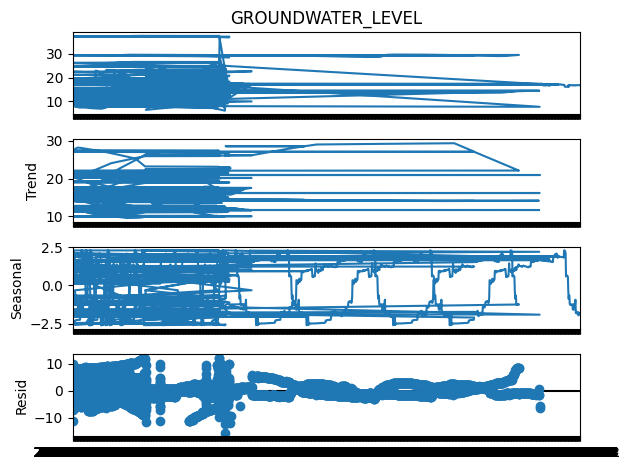

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['GROUNDWATER_LEVEL'], model='additive', period=365)

# Plotting the decomposed time series components
decomposition.plot()
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your dataframe is named df
# Filter the DataFrame for the year 2015
df_2015 = df[df['Year'] == 2015]

# Group by Date and calculate the mean groundwater level for that date
daily_average = df_2015.groupby('Date')['GROUNDWATER_LEVEL'].mean()

# Ensure that 'daily_average' has a DateTime index with a frequency set
# This is important for seasonal decomposition to work properly.
daily_average.index = pd.DatetimeIndex(daily_average.index)
daily_average = daily_average.asfreq('D')


In [18]:
daily_average.interpolate(method='time', inplace=True)

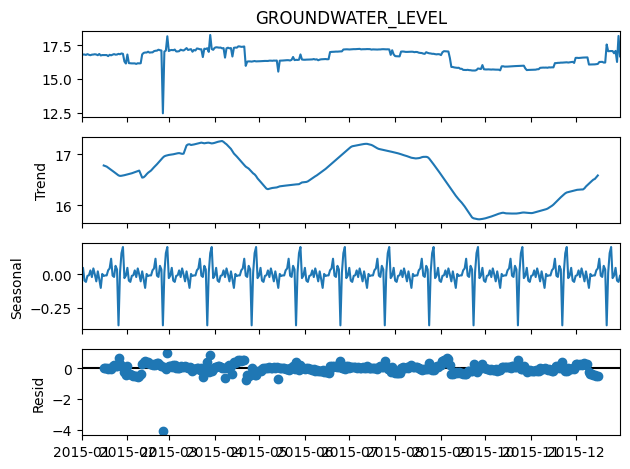

In [24]:
# Assuming your 'daily_average' is a time series with daily frequency and no missing values

# Specify the period for monthly seasonality, assuming 30 days in a month
monthly_period = 30

# Decompose the time series with the new monthly period
decomposition = seasonal_decompose(daily_average, model='additive', period=monthly_period)

# Plotting the decomposed time series components
fig = decomposition.plot()
plt.show()


In [4]:
for column_name, dtype in df.dtypes.items():
    print(f"Column '{column_name}' has data type: {dtype}")
df

Column 'ID' has data type: object
Column 'GROUNDWATER_LEVEL' has data type: float64
Column 'Day' has data type: int64
Column 'Month' has data type: int64
Column 'Year' has data type: int64
Column 'Latitude' has data type: float64
Column 'Longitude' has data type: float64
Column 'Ground surface elevation' has data type: float64
Column 'LIS_Soil_Moisture_Combined' has data type: float64
Column 'LIS_Streamflow' has data type: float64
Column 'LIS_ET' has data type: float64
Column 'Date' has data type: object
Column 'MOD13Q1_061__250m_16_days_EVI' has data type: float64
Column 'MOD13Q1_061__250m_16_days_MIR_reflectance' has data type: float64
Column 'MOD13Q1_061__250m_16_days_NDVI' has data type: float64
Column 'NASA_IMERG_Late' has data type: float64
Column 'DepthToGroundwater' has data type: object
Column 'Curvatu_tif2' has data type: float64
Column 'Drainage_density' has data type: float64
Column 'Slope_tif2' has data type: float64
Column 'Hydrogeo' has data type: float64
Column 'NASADEM

,ID,GROUNDWATER_LEVEL,Day,Month,Year,Latitude,Longitude,Ground surface elevation,LIS_Soil_Moisture_Combined,LIS_Streamflow,...,MOD13Q1_061__250m_16_days_EVI,MOD13Q1_061__250m_16_days_MIR_reflectance,MOD13Q1_061__250m_16_days_NDVI,NASA_IMERG_Late,DepthToGroundwater,Curvatu_tif2,Drainage_density,Slope_tif2,Hydrogeo,NASADEM_HGT
0,NWP00001,14.26,14,4,2016,13.420804,-16.716666,19.47,0.172124,0.059371,...,0.2113,0.3972,0.2564,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
1,NWP00001,13.82,26,12,2015,13.420804,-16.716666,19.47,0.210837,0.136391,...,0.2443,0.1787,0.4064,1.3,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
2,NWP00001,13.82,25,12,2015,13.420804,-16.716666,19.47,0.211614,0.138738,...,0.2443,0.1787,0.4064,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
3,NWP00001,13.83,24,12,2015,13.420804,-16.716666,19.47,0.212448,0.141231,...,0.2443,0.1787,0.4064,0.1,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
4,NWP00001,13.83,23,12,2015,13.420804,-16.716666,19.47,0.213260,0.143826,...,0.2443,0.1787,0.4064,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,NWP21002,16.85,5,1,2015,13.240281,-16.713889,21.68,0.232334,0.085506,...,0.1795,0.2054,0.3419,0.5,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
6632,NWP21002,16.79,4,1,2015,13.240281,-16.713889,21.68,0.232903,0.086226,...,0.1795,0.2054,0.3419,0.1,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
6633,NWP21002,16.82,3,1,2015,13.240281,-16.713889,21.68,0.233475,0.086970,...,0.1795,0.2054,0.3419,0.0,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
6634,NWP21002,16.82,2,1,2015,13.240281,-16.713889,21.68,0.234051,0.087731,...,0.1795,0.2054,0.3419,0.0,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0


In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

def prepare_geodataframe(df: pd.DataFrame) -> gpd.GeoDataFrame:
    """
    Convert a DataFrame with latitude and longitude to a GeoDataFrame.

    Args:
    df: DataFrame with 'Latitude' and 'Longitude' columns.

    Returns:
    A GeoDataFrame with Point geometry.
    """
    # Create Point geometry
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))
    return gdf

In [6]:
# Convert to GeoDataFrame
gdf = prepare_geodataframe(df=df)

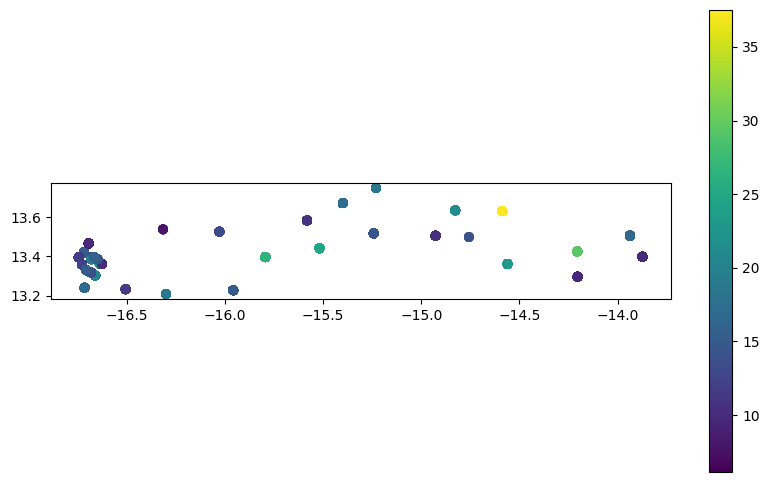

In [8]:
def plot_heatmap(gdf: gpd.GeoDataFrame, column: str) -> None:
    """
    Plot a heatmap based on a specified column in the GeoDataFrame.

    Args:
    gdf: GeoDataFrame with Point geometry.
    column: Column name for the values to plot (e.g., 'GROUNDWATER_LEVEL').
    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    gdf.plot(column=column, ax=ax, legend=True, cmap='viridis')
    plt.show()

# Example of plotting a heatmap
plot_heatmap(gdf=gdf, column='GROUNDWATER_LEVEL')


In [9]:
def create_interactive_heatmap(gdf: gpd.GeoDataFrame, column: str) -> folium.Map:
    """
    Create an interactive heatmap using folium.

    Args:
    gdf: GeoDataFrame with Point geometry.
    column: Column name for the values to plot (e.g., 'GROUNDWATER_LEVEL').

    Returns:
    Folium Map object.
    """
    # Create a map object
    m = folium.Map(location=[gdf['Latitude'].mean(), gdf['Longitude'].mean()], zoom_start=5)

    # Add HeatMap
    heat_data = [[point.xy[1][0], point.xy[0][0], value] for point, value in zip(gdf.geometry, gdf[column])]
    HeatMap(heat_data).add_to(m)

    return m

# Example of creating an interactive map
heatmap = create_interactive_heatmap(gdf=gdf, column='GROUNDWATER_LEVEL')
heatmap.save('groundwater_heatmap.html')

# MACHINE LEARNING TECHNIQUES

In [4]:
import pandas as pd
from sklearn.neighbors import BallTree
import numpy as np

# Extract relevant columns
geo_data = df[['Latitude', 'Longitude', 'Hydrogeo']]

# Separate rows with and without NaN in 'Hydrogeo'
geo_with_value = geo_data.dropna(subset=['Hydrogeo'])
geo_with_nan = geo_data[geo_data['Hydrogeo'].isna()]

# Create a BallTree
tree = BallTree(geo_with_value[['Latitude', 'Longitude']].values, metric='haversine')

# Function to find nearest value
def find_nearest(lat, lon, tree, data):
    dist, idx = tree.query(np.array([[lat, lon]]), k=1)
    return data.iloc[idx[0]]['Hydrogeo']


In [5]:
# Impute missing values
imputed_values = geo_with_nan.apply(
    lambda row: find_nearest(row['Latitude'], row['Longitude'], tree, geo_with_value),
    axis=1
)

In [7]:
# Assuming imputed_values is a Series or list of the imputed 'Hydrogeo' values
# and geo_with_nan has the same length and order as imputed_values

for original_index, imputed_value in zip(geo_with_nan.index, imputed_values):
    df.at[original_index, 'Hydrogeo'] = imputed_value


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Mapping each unique string in 'DepthToGroundwater' to an integer
unique_values = df['DepthToGroundwater'].unique()
value_to_int = {value: idx for idx, value in enumerate(unique_values)}

# Apply the mapping to the column
df['DepthToGroundwater'] = df['DepthToGroundwater'].map(value_to_int)

# Unique IDs
unique_ids = df['ID'].unique()

# Split IDs into train and test sets
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

# Split the dataframe based on IDs
train_df = df[df['ID'].isin(train_ids)]
test_df = df[df['ID'].isin(test_ids)]

# Features and target
X_train = train_df.drop(columns=['GROUNDWATER_LEVEL', 'ID'])
y_train = train_df['GROUNDWATER_LEVEL']
X_test = test_df.drop(columns=['GROUNDWATER_LEVEL', 'ID'])
y_test = test_df['GROUNDWATER_LEVEL']

# Features and target, excluding the 'Date' column
X_train = train_df.drop(columns=['GROUNDWATER_LEVEL', 'ID', 'Date'])
y_train = train_df['GROUNDWATER_LEVEL']
X_test = test_df.drop(columns=['GROUNDWATER_LEVEL', 'ID', 'Date'])
y_test = test_df['GROUNDWATER_LEVEL']

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R² Score: {r2}')


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [20]:
df

,ID,GROUNDWATER_LEVEL,Day,Month,Year,Latitude,Longitude,Ground surface elevation,LIS_Soil_Moisture_Combined,LIS_Streamflow,...,MOD13Q1_061__250m_16_days_EVI,MOD13Q1_061__250m_16_days_MIR_reflectance,MOD13Q1_061__250m_16_days_NDVI,NASA_IMERG_Late,DepthToGroundwater,Curvatu_tif2,Drainage_density,Slope_tif2,Hydrogeo,NASADEM_HGT
0,NWP00001,14.26,14,4,2016,13.420804,-16.716666,19.47,0.172124,0.059371,...,0.2113,0.3972,0.2564,0.0,0,-6.480000e+09,57.568844,2.785167,5.0,25.0
1,NWP00001,13.82,26,12,2015,13.420804,-16.716666,19.47,0.210837,0.136391,...,0.2443,0.1787,0.4064,1.3,0,-6.480000e+09,57.568844,2.785167,5.0,25.0
2,NWP00001,13.82,25,12,2015,13.420804,-16.716666,19.47,0.211614,0.138738,...,0.2443,0.1787,0.4064,0.0,0,-6.480000e+09,57.568844,2.785167,5.0,25.0
3,NWP00001,13.83,24,12,2015,13.420804,-16.716666,19.47,0.212448,0.141231,...,0.2443,0.1787,0.4064,0.1,0,-6.480000e+09,57.568844,2.785167,5.0,25.0
4,NWP00001,13.83,23,12,2015,13.420804,-16.716666,19.47,0.213260,0.143826,...,0.2443,0.1787,0.4064,0.0,0,-6.480000e+09,57.568844,2.785167,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,NWP21002,16.85,5,1,2015,13.240281,-16.713889,21.68,0.232334,0.085506,...,0.1795,0.2054,0.3419,0.5,2,-1.296000e+09,69.201469,2.321531,5.0,25.0
6632,NWP21002,16.79,4,1,2015,13.240281,-16.713889,21.68,0.232903,0.086226,...,0.1795,0.2054,0.3419,0.1,2,-1.296000e+09,69.201469,2.321531,5.0,25.0
6633,NWP21002,16.82,3,1,2015,13.240281,-16.713889,21.68,0.233475,0.086970,...,0.1795,0.2054,0.3419,0.0,2,-1.296000e+09,69.201469,2.321531,5.0,25.0
6634,NWP21002,16.82,2,1,2015,13.240281,-16.713889,21.68,0.234051,0.087731,...,0.1795,0.2054,0.3419,0.0,2,-1.296000e+09,69.201469,2.321531,5.0,25.0


In [10]:
# Check for NaNs in the training set
nan_train = X_train.isna().sum()
print("NaNs in Training Set:\n", nan_train)

# Check for NaNs in the testing set
nan_test = X_test.isna().sum()
print("\nNaNs in Testing Set:\n", nan_test)


NaNs in Training Set:
 Day                                            0
Month                                          0
Year                                           0
Latitude                                       0
Longitude                                      0
Ground surface elevation                       0
LIS_Soil_Moisture_Combined                     0
LIS_Streamflow                                 0
LIS_ET                                         0
MOD13Q1_061__250m_16_days_EVI                  0
MOD13Q1_061__250m_16_days_MIR_reflectance      0
MOD13Q1_061__250m_16_days_NDVI                 0
NASA_IMERG_Late                                0
DepthToGroundwater                             0
Curvatu_tif2                                   0
Drainage_density                               0
Slope_tif2                                     0
Hydrogeo                                     317
NASADEM_HGT                                    0
dtype: int64

NaNs in Testing Set:
 Day       